## **Heart Disease Prediction (Quantum)**

# Business problem Understanding

Death from heart disease is one of the leading causes of mortality. It is possible to mitigate the fatality rates and improve the care of patients with advanced heart disease through preemptive measures like timely intervention and accurate prediction alongside effective treatment plans. This project proposes to build a machine learning algorithm aimed to predict heart disease based on various clinical parameters - age, sex, blood pressure, cholesterol levels, heart rate, and a novel QuantumPatternFeature. Such an accurate predictive model will aid the decision making process for medical professionals, streamline the treatment, and ultimately improve the patient’s wellbeing.



# Source of Dataset
https://www.kaggle.com/datasets/shantanugarg274/heart-prediction-dataset-quantum


Rows: 500

Columns: 7

Features:

Age: Patient's age in years

Gender: 0 (Female), 1 (Male)

BloodPressure: Blood pressure level

Cholesterol: Cholesterol level

HeartRate: Heart rate in beats per minute

QuantumPatternFeature: A custom-engineered feature , so that best performing model can be distinguished.

HeartDisease (Target): 0 (No heart disease), 1 (Heart disease present)

# Importing Necessary Libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Uploading the Dataset

In [ ]:
df=pd.read_csv('Heart Prediction Quantum Dataset.csv')
df.head()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,68,1,105,191,107,8.362241,1
1,58,0,97,249,89,9.249002,0
2,44,0,93,190,82,7.942542,1
3,72,1,93,183,101,6.495155,1
4,37,0,145,166,103,7.653900,1


## Train and test split

In [ ]:
df_train,df_test=train_test_split(df,test_size=0.2,random_state=42)
df.shape,df_train.shape,df_test.shape

((500, 7), (400, 7), (100, 7))

## Detailed analysis of data

In [ ]:
df_train.isnull().sum()

,0
Age,0
Gender,0
BloodPressure,0
Cholesterol,0
HeartRate,0
QuantumPatternFeature,0
HeartDisease,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 249 to 102
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    400 non-null    int64  
 1   Gender                 400 non-null    int64  
 2   BloodPressure          400 non-null    int64  
 3   Cholesterol            400 non-null    int64  
 4   HeartRate              400 non-null    int64  
 5   QuantumPatternFeature  400 non-null    float64
 6   HeartDisease           400 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 25.0 KB


In [ ]:
print(df_train['Gender'].unique())
print(df_train['Age'].unique())

[0 1]
[49 35 73 50 51 37 67 41 64 43 63 59 38 77 58 36 68 66 62 78 33 55 45 53
 71 61 34 76 31 40 32 57 52 54 72 46 48 79 56 60 74 30 69 42 39 65 47 75
 44 70]


In [ ]:
df_train.describe()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
count,400.00000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000
mean,55.03500,0.465000,132.57500,222.462500,88.835000,8.313969,0.600000
std,14.08153,0.499398,26.49423,43.274882,17.441281,0.883992,0.490511
min,30.00000,0.000000,90.00000,150.000000,60.000000,6.411719,0.000000
25%,44.00000,0.000000,110.00000,186.000000,73.000000,7.668783,0.000000
50%,56.50000,0.000000,131.00000,221.000000,89.000000,8.329196,1.000000
75%,66.00000,1.000000,155.25000,258.000000,104.000000,8.898728,1.000000
max,79.00000,1.000000,179.00000,299.000000,119.000000,10.784886,1.000000


<Axes: xlabel='HeartDisease', ylabel='count'>

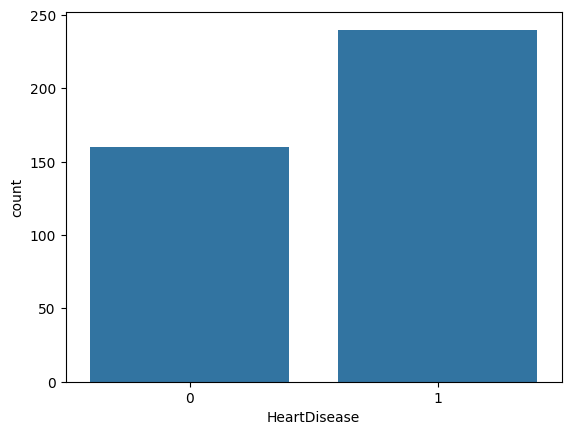

In [ ]:
sns.countplot(x='HeartDisease',data=df_train)

## Feature Selection & Splitting Data

In [ ]:
x_train= df_train.drop(['HeartDisease'],axis=1)
y_train= df_train['HeartDisease']
x_test= df_test.drop(['HeartDisease'],axis=1)
y_test= df_test['HeartDisease']

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(400, 6) (400,) (100, 6) (100,)


### Features Scaling

In [ ]:
numerical_attributes = x_train.select_dtypes(include=['number']).columns
ct = ColumnTransformer(transformers=[('numerical', StandardScaler(), numerical_attributes)], remainder='passthrough')
x_train_encoded = ct.fit_transform(x_train)
x_test_encoded = ct.transform(x_test)

## Model Prediction

In [ ]:
models = {
    'Logistic Regression': (LogisticRegression(), param_grid_logistic),
    'Random Forest': (RandomForestClassifier(), param_grid_rf),
    'K-Nearest Neighbors': (KNeighborsClassifier(), param_grid_knn)
}

In [ ]:

# Logistic Regression Parameter Grid
param_grid_logistic = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']  # 'saga' can handle L1 penalty
}

# Random Forest Parameter Grid
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# KNN Parameter Grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [ ]:
# prompt: print accurazcy

best_models = {}

for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(x_train_encoded, y_train)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(x_test_encoded)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    class_report = classification_report(y_test, y_pred)

    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Accuracy for {name}: {accuracy}")
    print("Confusion Matrix:")
    print(confusion_matrix)
    print("\n")
    print("Classification Report:")
    print(class_report)
    print("\n")
    best_models[name] = (best_model, accuracy)


Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy for Logistic Regression: 0.93
Confusion Matrix:
Predicted   0   1
Actual           
0          40   0
1           7  53


Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        40
           1       1.00      0.88      0.94        60

    accuracy                           0.93       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100



Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy for Random Forest: 0.93
Confusion Matrix:
Predicted   0   1
Actual           
0          40   0
1           7  53


Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        40
           1       1.00      0.88      0.94    

# **Explanation of Model Selection**

logistic regression

Random forest

K-Nearest neighbour

Throught this Model predction K-nearest model has the best accuracy we got

K-Nearest Neighbors (KNN) performed best because it works well with small to medium-sized datasets like yours (500 samples). Since KNN is a distance-based algorithm, it effectively identifies patterns when data points are well-clustered, which might be the case in your heart disease dataset. Unlike models that assume linear relationships (e.g., Logistic Regression), KNN does not require any prior assumptions about data distribution, making it suitable for potentially complex patterns introduced by the **QuantumPatternFeature**. The dataset's relatively low dimensionality (six features) prevents KNN from suffering the "curse of dimensionality," ensuring better performance. Additionally, the proper selection of **k (number of neighbors)** likely optimized KNN’s predictive accuracy by balancing bias and variance. It also handles non-linearity well, which could be crucial if heart disease is influenced by intricate relationships between features. However, KNN's performance depends on having well-scaled data since it relies on distance calculations. Compared to more complex models like decision trees or SVM, KNN is simple yet effective when data is structured favorably. Although it can be computationally expensive for large datasets, this wasn't an issue here due to the dataset’s manageable size. Hence, KNN’s ability to learn complex relationships without requiring extensive training made it the best-performing model.